<a href="https://colab.research.google.com/github/yuki-2000/Image_processing_lecture/blob/main/IP2022_05_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### 初期設定（このセルの中身は触らなくて良い）
import numpy as np # 数値解析パッケージnumpyのimport
import cv2 # 画像処理パッケージopencvのimport
import matplotlib.pyplot as plt # 描画パッケージmatplotlibのimport
import imutils

# Google Colab固有の設定
from google.colab import files
from google.colab.patches import cv2_imshow

# Google driveのmount
from google.colab import drive
drive.mount('/content/drive/')
# Google Colab用directoryに移動
%cd "/content/drive/MyDrive/Colab Notebooks/画像処理/"

Mounted at /content/drive/
/content/drive/MyDrive/Colab Notebooks/画像処理


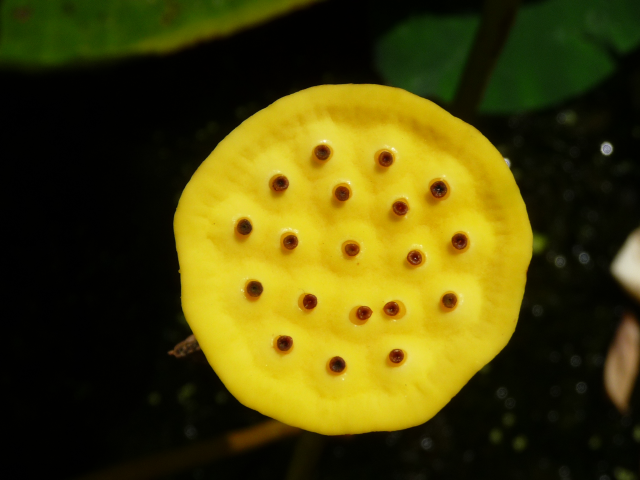

In [ ]:
### 1-1: 画像の読込と表示（このセルの中身は触らなくて良い）
img1 = imutils.url_to_image('https://bit.ly/3VQeHqI')

# 読み込めなかった場合の例外処理
if img1 is None:
  print('Image file not found.')

# 画像の表示
cv2_imshow(img1)

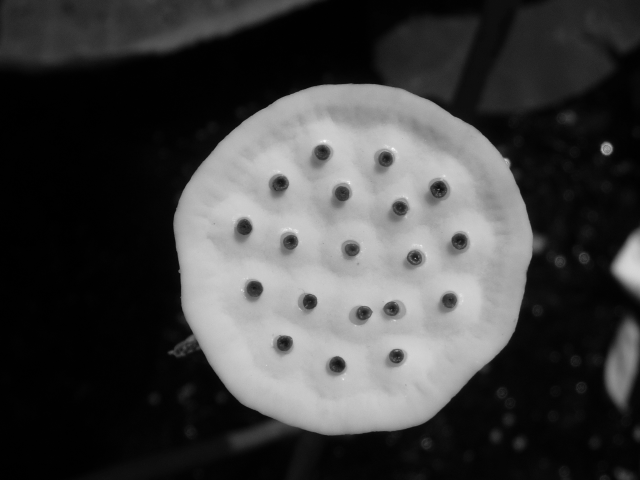

In [ ]:
### 1-2: 色空間の変換（このセルの中身は触らなくて良い）
gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

cv2_imshow(gray_img1)

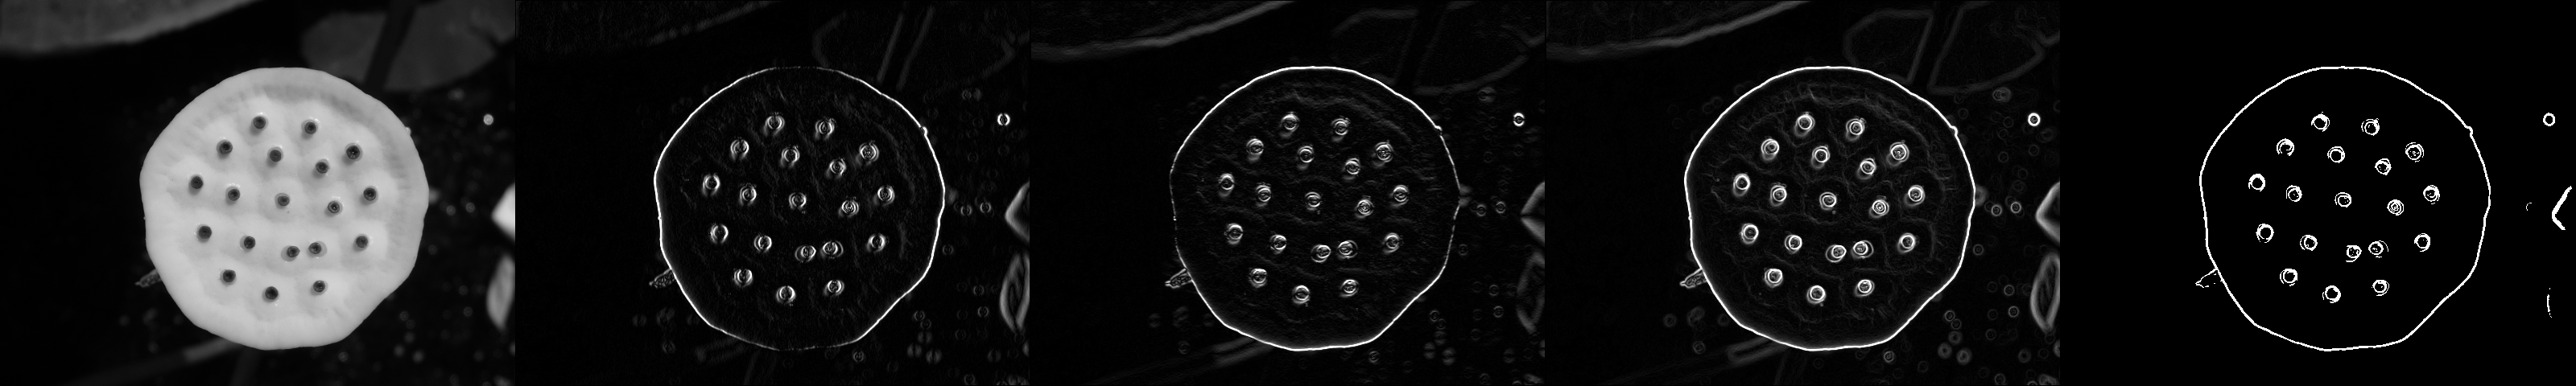

In [ ]:
### 課題5-1: Sobelフィルタ
import numpy as np
rows1, cols1 = gray_img1.shape
sobel_x = np.zeros((rows1, cols1), np.float32) 
sobel_y = np.zeros((rows1, cols1), np.float32) 
sobel_edge_img = np.zeros((rows1, cols1), np.uint8) # エッジ強度を記録する黒い画像を用意

sobel_filter_x = np.array([[-1,0,1],
                          [-2,0,2],
                          [-1,0,1]])
sobel_filter_y = np.array([[-1,-2,-1],
                          [0,0,0],
                          [1,2,1]])


for i in range(1, rows1-1):
  for j in range(1, cols1-1):
    sobel_x[i][j] = np.abs(np.sum(np.multiply(gray_img1[i-1:i+2, j-1:j+2], sobel_filter_x)))
    sobel_y[i][j] = np.abs(np.sum(np.multiply(gray_img1[i-1:i+2, j-1:j+2], sobel_filter_y)))





gradient_img = np.sqrt(sobel_x**2 + sobel_y**2) # 勾配の計算




# ラスタ走査して画素毎に勾配強度で閾値処理
for i in range(rows1):
  for j in range(cols1):
    if gradient_img[i][j] > 127:
      sobel_edge_img[i][j] = 255
    else: 
      sobel_edge_img[i][j] = 0
# 各処理段階の画像を並べて表示
figure = np.hstack((gray_img1, sobel_x, sobel_y,gradient_img,sobel_edge_img ))
cv2_imshow(figure)


